# **Digit Recognizer**




The Convloutional Neural Network (CNN) hase been employed on MNIST image digits dataset. The Keras API has been used in this project to build the model. 

## **Part1: Data Wrangling**
First we load the data and visualized it.
Then, check for null and missing values.




In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


In [92]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [93]:
import io

###  Load the data

In [94]:
# Load the data
train_file = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [95]:
train_file.shape

(42000, 785)

In [96]:
train_file.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The train_file includes 42000 rows (image) and 785 columns. 784 feature and one 'label' which is the target variable.

In [97]:
#train_file.dtypes

In [98]:
#train_file.describe()

### Check for missing values

In [99]:
# Check for missing values
train_file.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [100]:
train_file.isnull().values.any()

False

There is no missing values in the train_file dataset.

### Prepare training dataset

In [101]:
# Prepare training dataset
Y_train = train_file['label']
X_train = train_file.drop(columns='label')


In [102]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [103]:
Y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

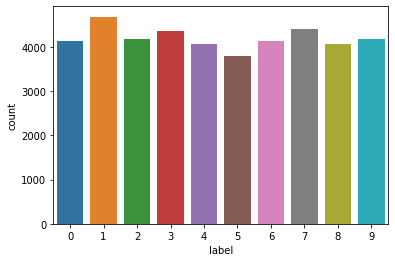

In [104]:
labels = sns.countplot(Y_train)

In [105]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

### Normalization
Perform normalization to grayscale image in order to convert the input data into a range 0-1 which is suitable for neural network models.

In [106]:
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0

### Reshape
The train_file dataframe is a 1D vectors of 784 pixel values. However, the Convolution2D layers in Keras are designed to work with 4 dimensions ([batch, in_height, in_width, in_channels).

In [107]:
# Reshape images into right format vectors
X_train = X_train.values.reshape(-1,28, 28, 1)

In [108]:
X_train.shape

(42000, 28, 28, 1)

### One-Hot Encoding
The one-hot encoding creates a new binary feature for each possible category and assigns a value of 1 to the feature of each sample that corresponds to its original category.

In [109]:
# Encode labels to one hot vectors 
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)

### Split train, test and validation set

Split the train dataset into train and test datasets. 20% of the data is considered as a test set and 80% as a train set.


In [110]:
# Split the dataset to train and the test
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state=0)

Split the new train dataset into train and validation datasets. 10% of the data is considered as a validation set and 90% as a train set.

In [111]:
# Split the train dataset to train and the vaidation set 
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size = 0.1, random_state=0)

In [112]:
X_train.shape

(30240, 28, 28, 1)

In [113]:
X_test.shape

(8400, 28, 28, 1)

In [114]:
X_validation.shape

(3360, 28, 28, 1)

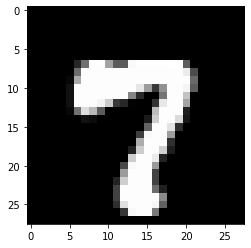

In [115]:
# Plot some images
img = plt.imshow(X_train[5][:,:,0], cmap='gray')

## **Convolutional Neural Network (CNN)**

In this project the Keras sequential API is used to group a linear stack of layers and build the model. The architecture of our CNN model is a stack of Conv2D and MaxPooling2D layers followed by a few dense layers.

This stack will extract features from the image. Then, these feature will be flattened to be feed to the dense layer to determine the class of an image based on presence of features.

### Build the Model

In [116]:
# Build a sequential model
model = keras.models.Sequential()

# Adding layers to this model

model.add(layers.Conv2D(filters=32, kernel_size = (3,3), padding = 'Same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size = (3,3), padding = 'Same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size = (3,3), padding = 'Same', activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


After building concolutional base, the extracted features should be classified.

In [117]:
# Adding dense layers

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

### Compiling

In [118]:
epochs = 12

Compile the model using "categorical_crossentropy" as a loss function since there is more than two label classes.

In [119]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss= 'categorical_crossentropy',  optimizer = optimizer, metrics=['accuracy'])

Callback
Create callbck to customize our training loop.

In [120]:
# EarlyStopping stops training when a monitored metric has stopped improving with patience (# epochs with no improvment aftertraining)
# ReduceLROnPlateau reduce learning rate when a metric has stopped improving with patience (# epochs with no improvment after reducing LR)

callbacks = [
             EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto'), 
             ReduceLROnPlateau(factor=0.1, patience=4, verbose=1, min_lr=0.00001)        
]

### Data Augmentation

To prevent overfitting and create a large data set, data augmentation can be used. It simply performs random transformations on the images to have a more generalized model.

In [121]:
# create a data generator object that transform images

datagen = ImageDataGenerator(
    featurewise_center = False,   # Set input mean to 0
    samplewise_center=False,  # Set each sample mean to 0
    featurewise_std_normalization=False,  # Divide inputs by std 
    samplewise_std_normalization=False,  # Divide each input by its std
    rotation_range = 10, # Randomly rotate images 
    zoom_range = 0.5,  # Randomly zoom image
    width_shift_range = 0.2,  # randomly shift images horizontally 
    height_shift_range = 0.2   # randomly shift images vertivally 
)
datagen.fit(X_train)

### Train the Model

In [122]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 32),
                              epochs = epochs, callbacks=callbacks, 
                              validation_data =(X_validation, Y_validation),
                              steps_per_epoch = len(X_train) // 32
                              )

Epoch 1/12
945/945 [==============================] - 51s 54ms/step - loss: 1.0872 - accuracy: 0.6334 - val_loss: 0.2754 - val_accuracy: 0.9128
Epoch 2/12
945/945 [==============================] - 51s 54ms/step - loss: 0.6080 - accuracy: 0.8073 - val_loss: 0.3150 - val_accuracy: 0.9080
Epoch 3/12
945/945 [==============================] - 51s 54ms/step - loss: 0.5340 - accuracy: 0.8316 - val_loss: 0.1898 - val_accuracy: 0.9411
Epoch 4/12
945/945 [==============================] - 51s 54ms/step - loss: 0.5048 - accuracy: 0.8393 - val_loss: 0.2330 - val_accuracy: 0.9327
Epoch 5/12
945/945 [==============================] - 49s 52ms/step - loss: 0.4901 - accuracy: 0.8478 - val_loss: 0.2701 - val_accuracy: 0.9223
Epoch 00005: early stopping


## **Evaluate Model**


Our model has 'accuracy' as the metric in compilation. Evaluate the model performance considering the loss and accuracy. 

In [123]:
print(model.metrics_names)

['loss', 'accuracy']


In [124]:
final_loss, final_acc = model.evaluate(X_validation, Y_validation, verbose=0)
print("Final loss is: {0:.3f} and final accuracy is: {1:.3f}".format(final_loss, final_acc))

Final loss is: 0.270 and final accuracy is: 0.922


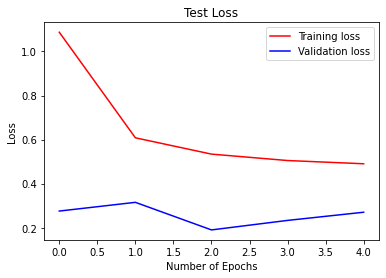

In [125]:
plt.plot(history.history['loss'], color='r', label='Training loss')
plt.plot(history.history['val_loss'], color='b', label='Validation loss')
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

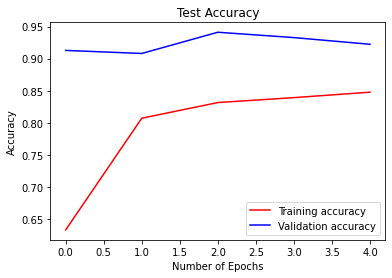

In [126]:
plt.plot(history.history['accuracy'], color='r', label='Training accuracy')
plt.plot(history.history['val_accuracy'], color='b', label='Validation accuracy')
plt.title("Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Evaluate Model on Test Dataset

In [127]:
# Evaluate the model using test data set
predictions = model.predict(X_test) 
predictions[122]

array([1.5877692e-08, 1.0417458e-11, 3.4923645e-10, 6.6354646e-06,
       2.1032389e-09, 9.9980778e-01, 5.9869325e-07, 1.3864982e-14,
       1.8478108e-04, 1.3684576e-07], dtype=float32)

In [128]:
# Consider maximum column index of each image as the final result
results = np.argmax(predictions, axis=1)
type(results)

numpy.ndarray

Confusion matrix visualizes the performance of the trained model.

In [129]:
Y_true = np.argmax(Y_test, axis = 1)
type(Y_true)

numpy.ndarray

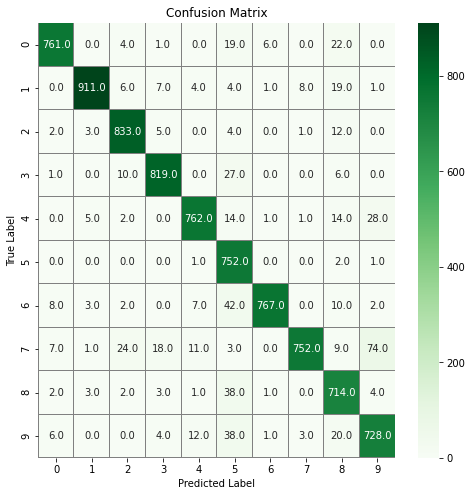

In [130]:
#confusion matrix

#Convert test observation to one-hot vector
#Y_true = np.argmax(Y_test, axis = 1)

# Confusion matrix 
cfm = confusion_matrix(Y_true, results)

#plot the confusion matrix
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cfm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Confusion matrix shows that our CNN performs well on all digits with few errors considering the test size is 8400.


In [131]:
df = pd.DataFrame({'True_Label': Y_true, 'Predicted_label': results})
df

,True_Label,Predicted_label
0,3,3
1,6,6
2,9,9
3,5,5
4,6,6
...,...,...
8395,9,0
8396,2,2
8397,2,2
8398,7,7


In [132]:
percentage = (df[df['True_Label'] == df['Predicted_label']].count() / len(df)) * 100
percentage

True_Label         92.845238
Predicted_label    92.845238
dtype: float64

In [133]:
comparison2 = np.where(df['True_Label'] == df['Predicted_label'], True, False)
df['equal'] = comparison2
df

,True_Label,Predicted_label,equal
0,3,3,True
1,6,6,True
2,9,9,True
3,5,5,True
4,6,6,True
...,...,...,...
8395,9,0,False
8396,2,2,True
8397,2,2,True
8398,7,7,True


In [134]:
count = np.count_nonzero(df['equal'])
count


7799

In [135]:
print('The accuracy of the predicted values for the test data using CNN model: {}'.format(count/len(df)))

The accuracy of the predicted values for the test data using CNN model: 0.9284523809523809
